# ***Abstract***

*As domain knowledge which usually is very helpful when dealing with the problem as there are lot of information on the features and theoretical knowledge helps us to get a basic understanding of how each feature behaves which can be helpful in Model Building. As the lack of domain knowledge prompted me to do lot of research on ideas such as “choosing the right accuracy”, “Model time Complexity” which made think a lot about the latency requirements, “Model Understandability”. Seeing the feature types helped me to think about Feature Engineering which I am planning to pursue as a part of future enhancement. This project also gave me lot of knowledge on the pipeline building and benefits. Building pipelines helped me to know some of the compatibility issues that are present in building Pipelines and ONNX Format Model deployment which is also area that I need to research to build pipelines efficiently.*


# Overveiw

***Problem statement:***  *Classify the given inputs into the Classes based on the information present in the given features keeping the constraints formed by pipeline -ONNX model combination support and latency.*<br><br>
***Relevant literature:*** *Techniques such as  SMOTE, Calibration-Models and optimal Metric selection has been studied. The data related to these are added in the References Below.*<br><br>
***Proposed methodology:*** <br><br>
*Step1: The first steps that I have taken is choosing the models of which I have shortlisted and Logistic Regression and SVM. <br>
Step2: The next step is of choosing the right metric from which I have shortlisted AUC and log-loss due to the Class-Imbalance present in the data and chose Log-Loss as the go-to metric.<br>
Step3: Understanding the metric is important to understand the Log-loss which is unbounded I have opted a strategy of comparing the Models with the Random Model and to further improve the understandability I have opted to build precision & Recall Matrices.<br>
Step4: To improve the final Model accuracy  I have tried using different models, tuned Hyper-parameters and applied transformation such as Standardization and eliminating Highly Corelated Features*<br>


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper

In [2]:
allLogLossTest=dict()
allLogLossCv=dict()

In [3]:
df=pd.read_csv("data_public.csv")

In [4]:
print(df.shape)

(1200000, 16)


In [5]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [6]:
print(df[df.isnull().any(axis=1)])
print(df[df.isna().any(axis=1)])
## all above are fixed
## Check below and remove un-necessary

Empty DataFrame
Columns: [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, Class]
Index: []
Empty DataFrame
Columns: [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, Class]
Index: []


In [7]:
df.dtypes

A        float64
B        float64
C        float64
D        float64
E        float64
F        float64
G        float64
H        float64
I        float64
J        float64
K        float64
L        float64
M        float64
N        float64
O        float64
Class      int64
dtype: object

From the Above null check and dtypes we can say that there are No Null values in the data

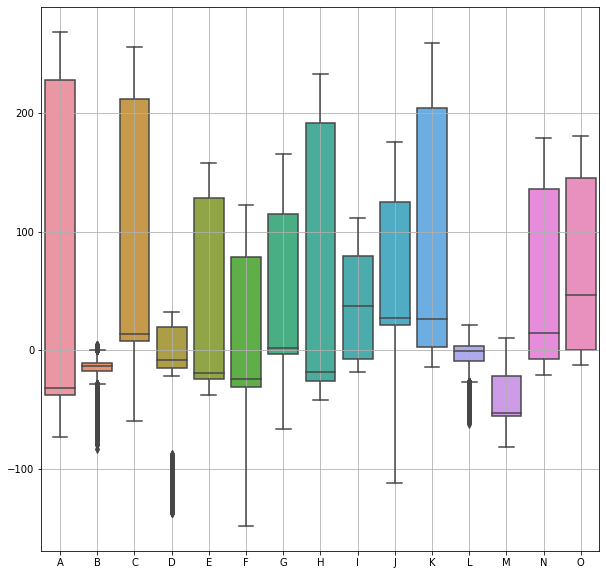

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.iloc[:,:-1])
plt.grid()
plt.show()


From the above bar plot we can see the spread of the features are different we can see features such as 'A','C','H','K' has large spread. where as 'B' and 'L' has very small spread

In [9]:
warnings.simplefilter(action='ignore', category=Warning) 
x_df,xTest,y_df,yTest=train_test_split(df,df.iloc[:,-1],test_size=0.2,random_state=123,shuffle=True,stratify=df.iloc[:,-1])
xTrain,xCv,yTrain,yCv=train_test_split(x_df,y_df,test_size=0.2,random_state=123,shuffle=True,stratify=y_df)

Splitting the data into train,test and Cross-Validation with following ratio<br>Train=64%<br>Test=20%<br>CV=16%<br>

In [10]:
# print('Number of points in training data is:', xTrain.shape[0])
# print('Number of points in testing data is:', xTest.shape[0])
# print('Number of points in CrossValidation data is:',xCv.shape[0])
print("Size of the xTrain Dataset is {}".format(xTrain.shape))
print("Size of the yTrain Dataset is {}".format(yTrain.shape))
print('************************************************************')
print("Size of the xTest Dataset is {}".format(xTest.shape))
print("Size of the yTest Dataset is {}".format(yTest.shape))
print('************************************************************')
print("Size of the xCv Dataset is {}".format(xCv.shape))
print("Size of the yCv Dataset is {}".format(yCv.shape))

Size of the xTrain Dataset is (768000, 16)
Size of the yTrain Dataset is (768000,)
************************************************************
Size of the xTest Dataset is (240000, 16)
Size of the yTest Dataset is (240000,)
************************************************************
Size of the xCv Dataset is (192000, 16)
Size of the yCv Dataset is (192000,)


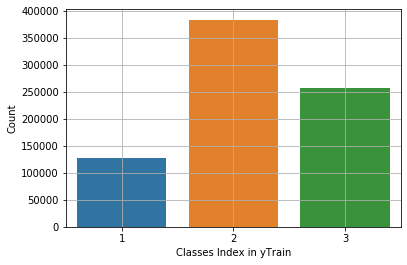

Data points in class 1 is (16.666 %)
Data points in class 3 is (33.398 %)
Data points in class 2 is (49.936 %)


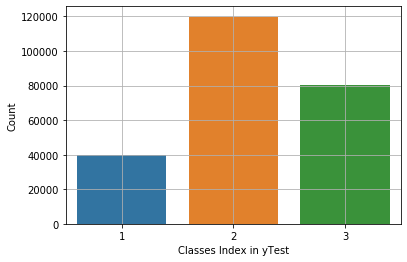

Data points in class 1 is (16.666 %)
Data points in class 3 is (33.398 %)
Data points in class 2 is (49.936 %)


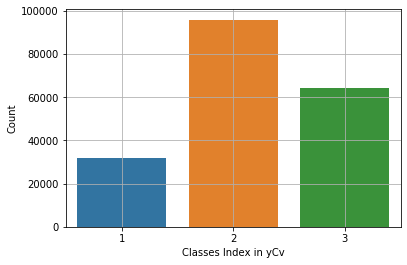

Data points in class 1 is (16.666 %)
Data points in class 3 is (33.398 %)
Data points in class 2 is (49.935 %)


In [11]:
xTrainDistribution=xTrain['Class'].value_counts().sort_values()
xTestDistribution=xTest['Class'].value_counts().sort_values()
xCvDistribution=xCv['Class'].value_counts().sort_values()
sns.barplot(x=xTrainDistribution.index, y=xTrainDistribution)
plt.xlabel("Classes Index in yTrain")
plt.ylabel("Count")
plt.grid()
plt.show()
for i in xTrainDistribution.keys():
    print("Data points in class {0} is ({1} %)".format(i,np.round((xTrainDistribution[i]/xTrain.shape[0]*100),3)))
sns.barplot(x=xTestDistribution.index, y=xTestDistribution)
plt.xlabel("Classes Index in yTest")
plt.ylabel("Count")
plt.grid()
plt.show()
for i in xTestDistribution.keys():
    print("Data points in class {0} is ({1} %)".format(i,np.round((xTestDistribution[i]/xTest.shape[0]*100),3)))
sns.barplot(x=xCvDistribution.index, y=xCvDistribution)
plt.xlabel("Classes Index in yCv")
plt.ylabel("Count")
plt.grid()
plt.show()
for i in xCvDistribution.keys():
    print("Data points in class {0} is ({1} %)".format(i,np.round((xCvDistribution[i]/xCv.shape[0]*100),3)))

*The above Graph represents* **imbalanced data**<br>
*Class 2 occurs more frequently followed by class 3 and then class 1 <br>
As the problem is a multiclass classification with imbalanced data checking the Train,CV & test data have a similar distribution of class labels<br>
From the above bar plots we can see that the Train,CV & test data have* **similar distributions** <br>

*As the data is imbalanced data using the* **Accuracy as metric is not an ideal choice.**<br>
*So choosing* **log-loss as the Metirc** *to define the model performance. <br>
The range of log-Loss is [0,Infinity].<br>
Log-Loss is 0 for perfect classifier.<br>
As log-loss is dependent on data unlike Accuracy which has range [0,1] to understand how good out model is using log -loss we need to build a  Random Classifier to make sense of the log-loss we get for diffrent models.*<br>


In [12]:
labels=['A', 'B','C','D','E','F','G','H','I','J','K','L','M','N','O','Class']
ct = ColumnTransformer([
        ('scaling', StandardScaler(), ['A', 'B','C','D','E','F','G','H','I','J','K','L','M','N','O'])
    ], remainder='passthrough')

xTrainStdScale=ct.fit_transform(xTrain)
xTrainStdScale=pd.DataFrame(xTrainStdScale,columns=labels)
xTrainStdScale['Class'] = xTrainStdScale['Class'].astype(int)

xCvStdScale=ct.transform(xCv)
xCvStdScale=pd.DataFrame(xCvStdScale,columns=labels)
xCvStdScale['Class'] = xCvStdScale['Class'].astype(int)

xTestStdScale=ct.transform(xTest)
xTestStdScale=pd.DataFrame(xTestStdScale,columns=labels)
xTestStdScale['Class'] = xTestStdScale['Class'].astype(int)

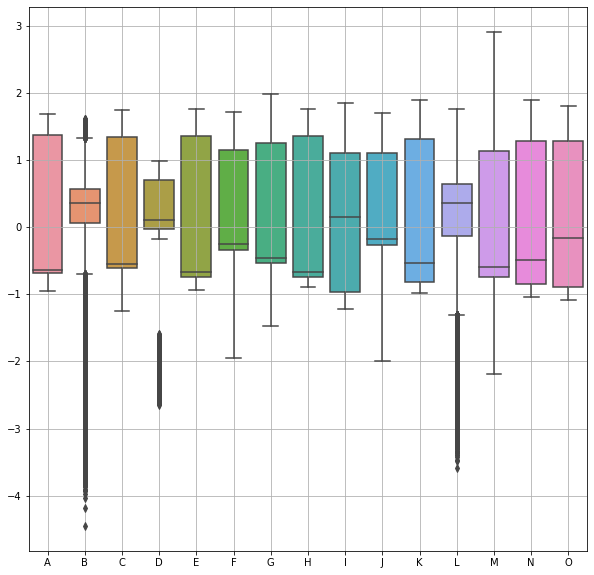

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(data=xTrainStdScale.iloc[:,:-1])
plt.grid()
plt.show()

*The above bargraph shows all the points are on the same scale*

In [14]:
#Building the Confusion Matrix,Precison matrix and Recall Matrix and representing it through HeatMap
def plotConfusion_precison_recall_Matrix(yTestValues,predictValues):
    cm=confusion_matrix(yTestValues,predictValues)
    A=(((cm.T)/(cm.sum(axis=1))).T)
    B=(cm/cm.sum(axis=0))
    labels=[1,2,3]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(12,8))
    sns.set(font_scale=2)
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("-"*20, "Precison matrix", "-"*20)
    plt.figure(figsize=(12,8))
    sns.heatmap(B,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("-"*20, "recall matrix", "-"*20)
    plt.figure(figsize=(12,8))
    sns.heatmap(A,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

*As the Log-loss is shown as just a number it is hard to interpret the model.<br>
TO increase the interpretability we are using COnfusion Matrix.<br>
As the data is imbalanced to further enhance the undersandability of the data we are building the Precison and Recall Matrix.* <br>

# Random Model

Log loss on CV Data using Random Model 1.339382697994399
Log loss on Test Data using Random Model 1.341951565812299
-------------------- Confusion matrix --------------------


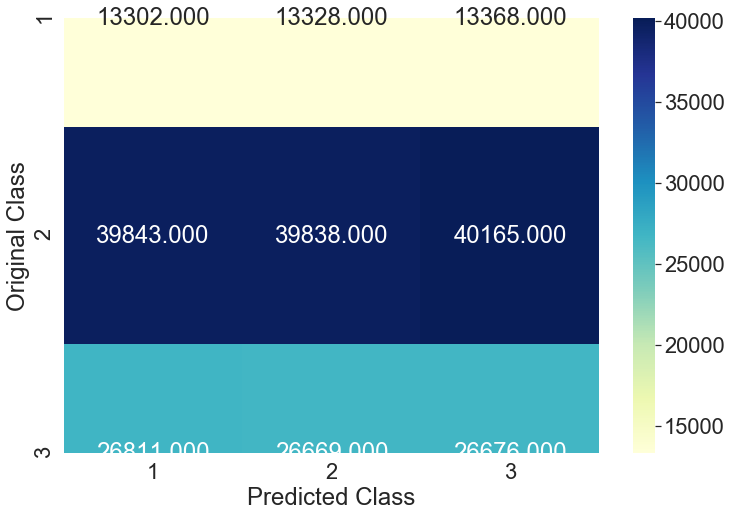

-------------------- Precison matrix --------------------


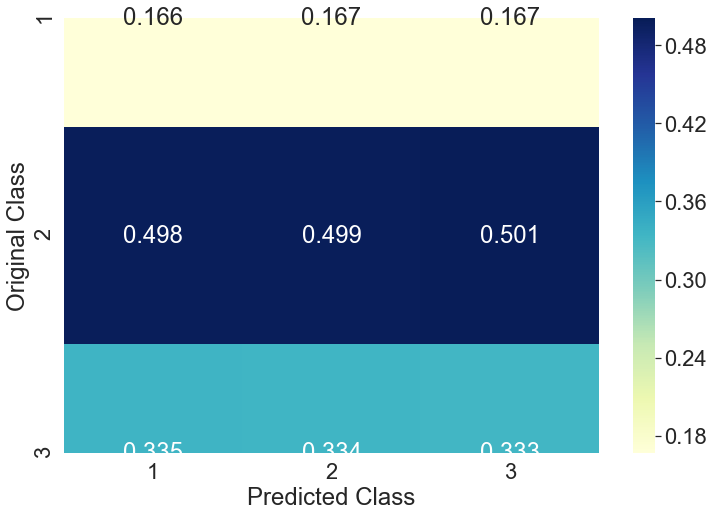

-------------------- recall matrix --------------------


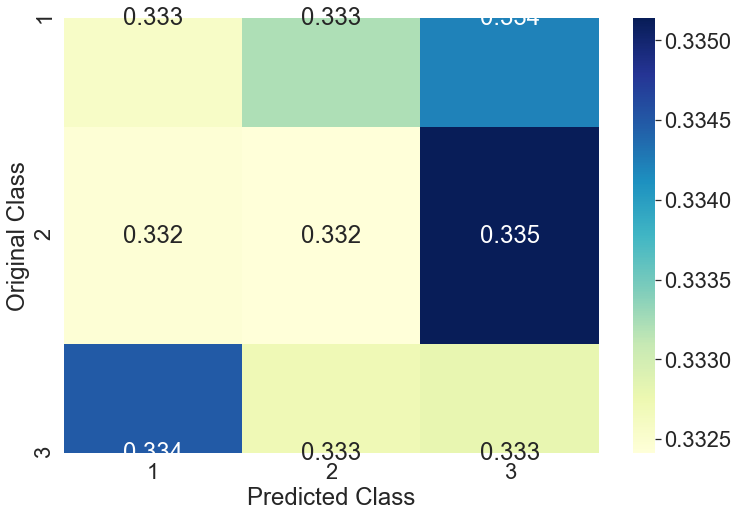

In [15]:
#Building Random Model for CV data and test Data
testDatalength=xTest.shape[0]
cvDataLength=xCv.shape[0]
cvRandomPredict=np.zeros((cvDataLength,3))
testRandomPredict=np.zeros((testDatalength,3))
for i in range(cvDataLength):
    probailities=np.random.rand(1,3)
    cvRandomPredict[i]=((probailities/sum(sum(probailities)))[0])
allLogLossCv['randModel']=log_loss(yCv,cvRandomPredict, eps=1e-15)
print("Log loss on CV Data using Random Model",log_loss(yCv,cvRandomPredict, eps=1e-15))

for i in range(testDatalength):
    probailities=np.random.rand(1,3)
    testRandomPredict[i]=((probailities/sum(sum(probailities)))[0])
allLogLossTest['randModel']=log_loss(yTest,testRandomPredict, eps=1e-15)
print("Log loss on Test Data using Random Model",log_loss(yTest,testRandomPredict, eps=1e-15))
prediction =np.argmax(testRandomPredict, axis=1)
prediction=prediction+1
plotConfusion_precison_recall_Matrix(yTest, prediction)

### Confusion Matrix<br>

*Each cell shows the number of points of original class with respect to predicted class.<br>
The first cell shows how many points which originally belongs to class 1 and predicted to be 1.<br>
The diagonal elements should be very large for a good classifier.<br>
As we have imbalanced class we cannot just rely on confusion Matrix to handle this we use precision matrix and recall matrix.*<br>
### Precision Matrix <br>

*Take each cell from the confusion matrix and divide it with the sum of all the cells in that particular column which it belongs to<br>
DEF: Normalize the column sum equal to 1 i.e sum of all the elements in the column is equal to 1<br>
Diagonal Elements give the precision of the class<br>
Non-Daiagonal Elements represents of all the points to be predicted to be belonged to a particular class X% percent actually belong to orginal class<br>
Diagonal Elements vaaue should be high*<br>

### Recall Matrix

*Take each cell from the confusion matrix and divide it with the sum of all the cells in that particular row which it belongs to.<br>
DEF: Normalize the row sum equal to 1 i.e sum of all the elements in the row is equal to 1
Non-Daiagonal Elements represents all the points that are originally belong to a class of them x% are classified to be a particular class by prediction
Diagonal Elements value should be high*

# 1. Logistic Regression

## 1.0 Logistic Regression HyperParameter Tuning

In [29]:
alphaLR = [10 ** x for x in range(-6, 3)]
to_drop = [ 'Class']
cvLogLossLr = []
for i in alphaLR:
    pipelineAlphaLr=Pipeline([
        ('mapper',DataFrameMapper([
        (xTrain.columns.drop(to_drop).values,
         [StandardScaler()]
        )
        ])),
        ('classifier',SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=1))
    ])
    
    pipelineAlphaLr.fit(xTrain.iloc[:,:-1], yTrain)
    predictProbSigLr=pipelineAlphaLr.predict_proba(xCv.iloc[:,:-1])
    cvLogLossLr.append(log_loss(yCv, predictProbSigLr, eps=1e-15))
    print("for alpha = {},Log Loss : {}".format(i,log_loss(yCv, predictProbSigLr)))

for alpha = 1e-06,Log Loss : 1.1090863960635244
for alpha = 1e-05,Log Loss : 1.0659271625455058
for alpha = 0.0001,Log Loss : 1.0576648453220174
for alpha = 0.001,Log Loss : 1.0506046343439999
for alpha = 0.01,Log Loss : 1.0522195657825417
for alpha = 0.1,Log Loss : 1.0522043928336386
for alpha = 1,Log Loss : 1.0517543380174086
for alpha = 10,Log Loss : 1.0660232224148456
for alpha = 100,Log Loss : 1.0783322967230249


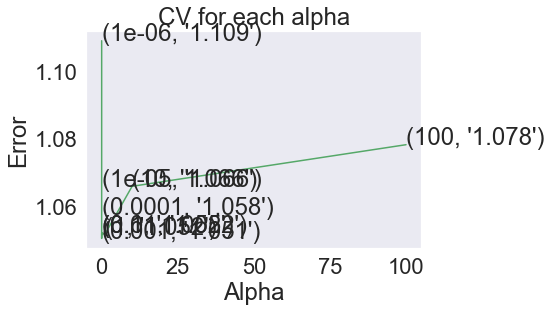

In [17]:
fig, ax = plt.subplots()
ax.plot(alphaLR, cvLogLossLr,c='g')
for i, txt in enumerate(np.round(cvLogLossLr,3)):
    ax.annotate((alphaLR[i],str(txt)), (alphaLR[i],cvLogLossLr[i]))
plt.grid()
plt.title("CV for each alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()

Using the logisticRegression to Build the model<br>
The above Code is used to find best hyperparameter for the Logistic Regression<br>
From it we can find the best alpha=0.0001 as it has lowest Log-Loss<br>

Buildng Logistic Regression Model using diffrent Approaches

In [19]:
bestAlphaLr = np.argmin(cvLogLossLr)
alphaToUseLR=alphaLR[bestAlphaLr]
alphaToUseLR

0.001

## 1.1 Logistic Regression with Class Balancing & standardization 

In [20]:

pipelineAlphaLr=Pipeline([
    ('mapper',DataFrameMapper([
    (xTrain.columns.drop(to_drop).values,
     [StandardScaler()]
    )
    ])),
    ('classifier',SGDClassifier(class_weight='balanced', alpha=alphaToUseLR, penalty='l2', loss='log', random_state=1))
])

pipelineAlphaLr.fit(xTrain.iloc[:,:-1], yTrain)
predictProbSigLr=pipelineAlphaLr.predict_proba(xCv.iloc[:,:-1])
print("for alpha = {},Log Loss : {}".format(alphaToUseLR,log_loss(yCv, predictProbSigLr)))

for alpha = 0.001,Log Loss : 1.0506046343439999


In [21]:
predictTest=pipelineAlphaLr.predict_proba(xTrain.iloc[:,:-1])
print("Log-Loss for Train data is {}".format(log_loss(yTrain,predictTest)))
predictTest=pipelineAlphaLr.predict_proba(xCv.iloc[:,:-1])
allLogLossCv['LrBal']=log_loss(yCv,predictTest)
print("Log-Loss for CV data is {}".format(log_loss(yCv,predictTest)))
predictTest=pipelineAlphaLr.predict_proba(xTest.iloc[:,:-1])
allLogLossTest['LrBal']=log_loss(yTest,predictTest)
print("Log-Loss for Test data is {}".format(log_loss(yTest,predictTest)))

Log-Loss for Train data is 1.0506236830512607
Log-Loss for CV data is 1.0506046343439999
Log-Loss for Test data is 1.0506012259005804


Log loss for the data is 1.0506046343439999
[[0.28039671 0.39413624 0.32546704]
 [0.28086719 0.39299834 0.32613448]
 [0.27908521 0.39402877 0.32688602]
 ...
 [0.28019942 0.39441064 0.32538994]
 [0.28236262 0.3958226  0.32181478]
 [0.27542311 0.39809985 0.32647704]]
[2 2 2 ... 2 2 2]
Number of Misclassified points are 96124
Percentage of points belonging to value 2 is 1.0
-------------------- Confusion matrix --------------------


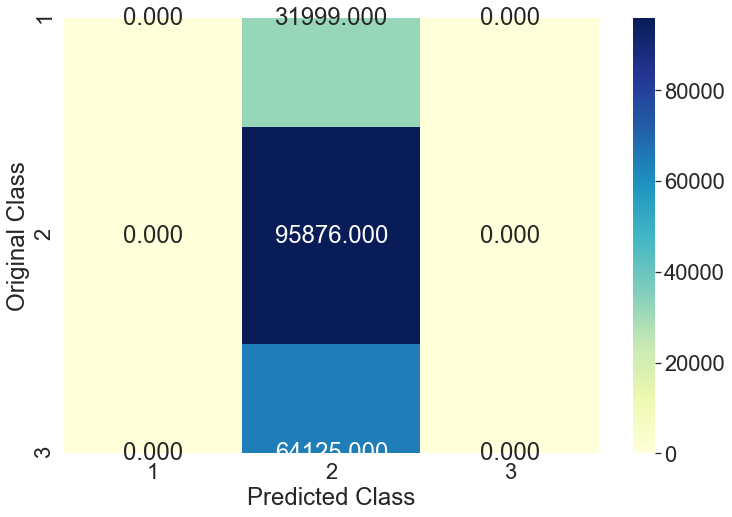

-------------------- Precison matrix --------------------


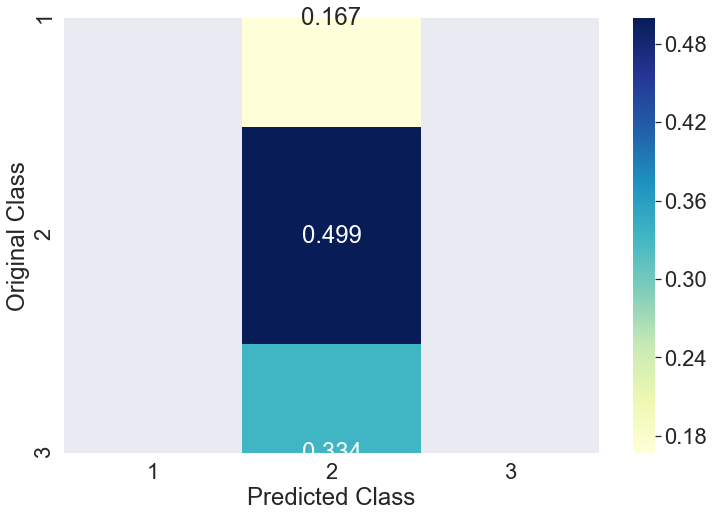

-------------------- recall matrix --------------------


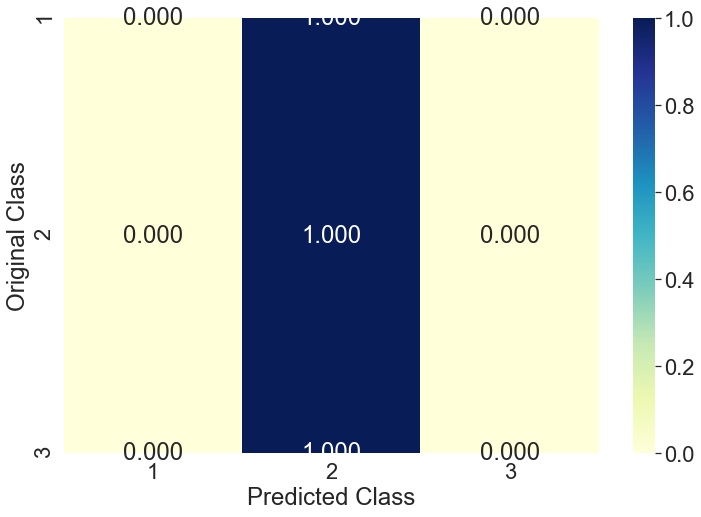

In [22]:
predict=pipelineAlphaLr.predict_proba(xCv.iloc[:,:-1])
print("Log loss for the data is {}".format(log_loss(yCv,predict)))
print(predict)
# predict
prediction =np.argmax(predict, axis=1)
# prediction
prediction=prediction+1
print(prediction)
print("Number of Misclassified points are {}".format(np.count_nonzero(yCv-prediction)))
#To check the percentage of points in each class from prediction
rock=pd.Series(prediction)
valueCountsDict=dict(rock.value_counts())
for i in valueCountsDict.keys():
    print("Percentage of points belonging to value {} is {}".format(i,(valueCountsDict[i]/sum(valueCountsDict.values()))))

plotConfusion_precison_recall_Matrix(yCv,prediction)

The log-loss that we have observed is better than that of the random model but it is not very good due to the  model predicting only one Class.<br>
The Precision & Recall matrix shows the prediction Results

## 1.2 Logistic Regression with Standardization & without Class Balancing

In [23]:
to_drop = [ 'Class']
pipelineAlphaLrNobal=Pipeline([
    ('mapper',DataFrameMapper([
    (xTrain.columns.drop(to_drop).values,
     [StandardScaler()]
    )
    ])),
    ('classifier',SGDClassifier(class_weight='balanced', alpha=alphaToUseLR, penalty='l2', loss='log', random_state=1))
])

pipelineAlphaLrNobal.fit(xTrain, yTrain)
predictProbSigLrNobal=pipelineAlphaLrNobal.predict_proba(xCv)
print("for alpha = {},Log Loss : {}".format(alphaToUseLR,log_loss(yCv, predictProbSigLrNobal)))

for alpha = 0.001,Log Loss : 1.0506046343439999


In [74]:
# Calculating the log-loss for Train CV & Test without Class Balancing
predictNoBal=pipelineAlphaLrNobal.predict_proba(xTrain.iloc[:,:-1])
print("Log-Loss for Train data is {}".format(log_loss(yTrain,predictNoBal)))
predictNoBal=pipelineAlphaLrNobal.predict_proba(xCv.iloc[:,:-1])
allLogLossCv['LrNoBal']=log_loss(yCv,predictNoBal)
print("Log-Loss for CV data is {}".format(log_loss(yCv,predictNoBal)))
predictNoBal=pipelineAlphaLrNobal.predict_proba(xTest.iloc[:,:-1])
allLogLossTest['LrNoBal']=log_loss(yTest,predictNoBal)
print("Log-Loss for Test data is {}".format(log_loss(yTest,predictNoBal)))

Log-Loss for Train data is 1.0506236830512607
Log-Loss for CV data is 1.0506046343439999
Log-Loss for Test data is 1.0506012259005804


Log loss for the data is 1.0506046343439999
[[0.28039671 0.39413624 0.32546704]
 [0.28086719 0.39299834 0.32613448]
 [0.27908521 0.39402877 0.32688602]
 ...
 [0.28019942 0.39441064 0.32538994]
 [0.28236262 0.3958226  0.32181478]
 [0.27542311 0.39809985 0.32647704]]
[2 2 2 ... 2 2 2]
Number of Misclassified points are 96124
Percentage of points belonging to value 2 is 1.0
-------------------- Confusion matrix --------------------


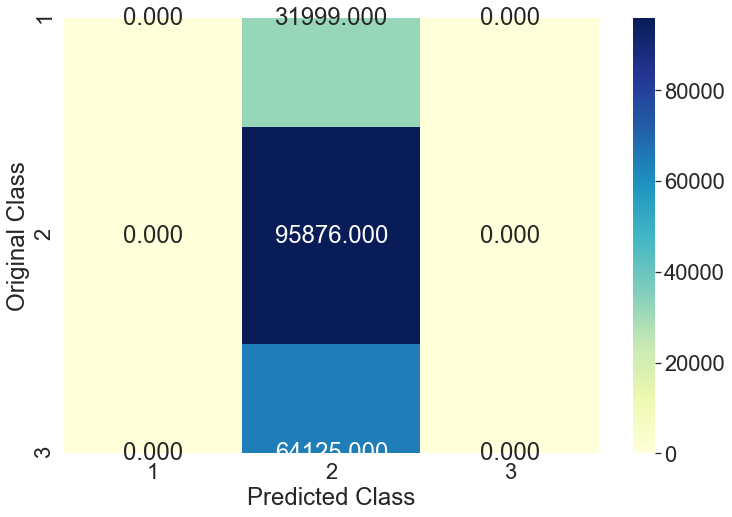

-------------------- Precison matrix --------------------


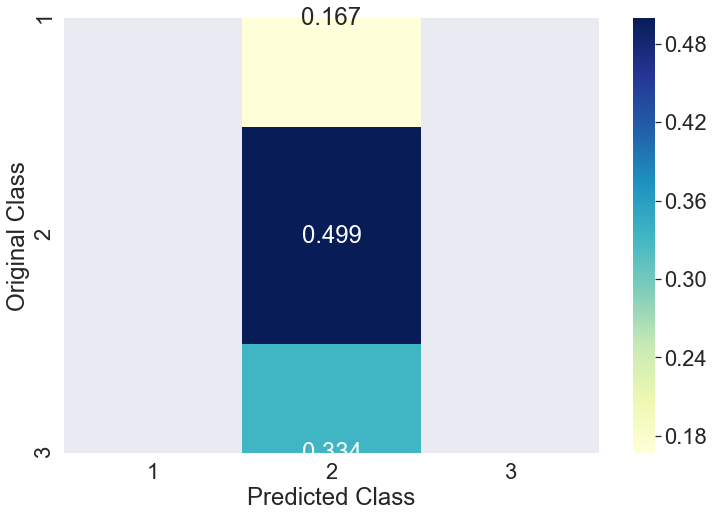

-------------------- recall matrix --------------------


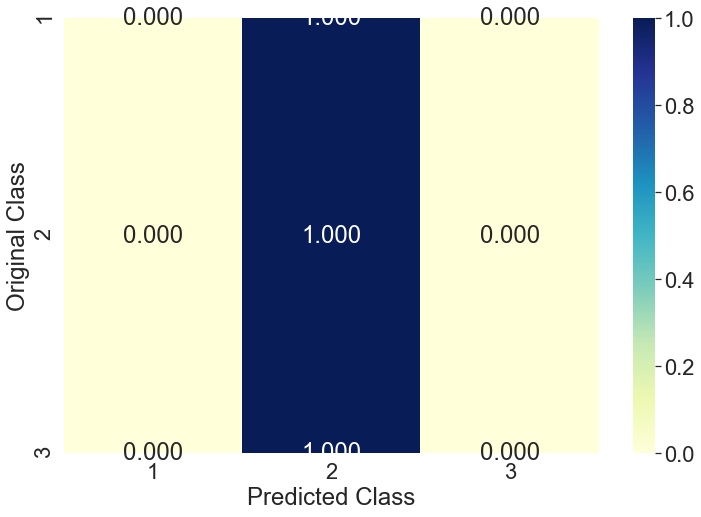

In [26]:
predictNoBal=pipelineAlphaLrNobal.predict_proba(xCv.iloc[:,:-1])
print("Log loss for the data is {}".format(log_loss(yCv,predictNoBal)))
print(predictNoBal)
# predict
predictionNoBal =np.argmax(predictNoBal, axis=1)
# prediction
predictionNoBal=predictionNoBal+1
print(predictionNoBal)
print("Number of Misclassified points are {}".format(np.count_nonzero(yCv-predictionNoBal)))
#To check the percentage of points in each class from prediction
rockNoBal=pd.Series(predictionNoBal)
valueCountsDictNoBal=dict(rockNoBal.value_counts())
for i in valueCountsDict.keys():
    print("Percentage of points belonging to value {} is {}".format(i,(valueCountsDictNoBal[i]/sum(valueCountsDictNoBal.values()))))

plotConfusion_precison_recall_Matrix(yCv,predictionNoBal)

Trying the Logistic Regression without balancing to see how it performs on raw imbalanced data it performs almost similarly to that of the Logistic Regression with the balanced data.<br>


## SMOTE Algorithm

Class=3, n=256499 (33.398%)
Class=1, n=127995 (16.666%)
Class=2, n=383506 (49.936%)


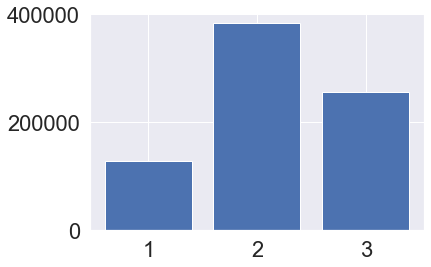

Class=3, n=383506 (33.333%)
Class=1, n=383506 (33.333%)
Class=2, n=383506 (33.333%)


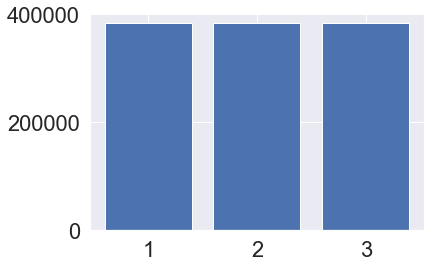

In [30]:
#Balancing the Data with the SMOTE Algorithm
# Testing the Code
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(yTrain)
for k,v in counter.items():
    per = v / len(yTrain) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

oversample=SMOTE()
XOverSample, yOverSample = oversample.fit_resample(xTrain, yTrain)
counter2 = Counter(yOverSample)
for k1,v1 in counter2.items():
    per = v1 / len(yOverSample) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k1, v1, per))
plt.bar(counter2.keys(), counter2.values())
plt.show()

Used Smote to Create synthetic points to balance the data i.e.Made the count of the all the classes equal to that of the Majority class<br>
The Figure1 shows the class Imbalance <br>
Where as the Figure 2 shows the class count after using SMOTE<br>

In [31]:
#Converting the SMOTE Variables to the Pandas Dataframe
labels=['A', 'B','C','D','E','F','G','H','I','J','K','L','M','N','O','Class']
XOverSample=pd.DataFrame(XOverSample,columns=labels)
yOverSample=pd.DataFrame(yOverSample,columns=['Class'])

## 1.4 Logistic Regression with SMOTE Balancing & Data Standardization

In [33]:
# Building Logistic Regression With Class Balancing  ad  Balnced usign SMOTE
to_drop = [ 'Class']
pipelineAlphaLrSmote=Pipeline([
    ('mapper',DataFrameMapper([
    (XOverSample.columns.drop(to_drop).values,
     [StandardScaler()]
    )
    ])),
    ('classifier',SGDClassifier(class_weight='balanced', alpha=alphaToUseLR, penalty='l2', loss='log', random_state=1))
])

pipelineAlphaLrSmote.fit(XOverSample,yOverSample)
predictProbSigLrSmote=pipelineAlphaLrSmote.predict_proba(xCv)
print("for alpha = {},Log Loss : {}".format(alphaToUseLR,log_loss(yCv, predictProbSigLrSmote)))

for alpha = 0.001,Log Loss : 1.100737489954131


In [36]:
predictBalSmote=pipelineAlphaLrSmote.predict_proba(XOverSample.iloc[:,:-1])
print("Log-Loss for Train data is {}".format(log_loss(yOverSample,predictBalSmote)))
predictBalSmote=pipelineAlphaLrSmote.predict_proba(xCv.iloc[:,:-1])
allLogLossCv['LrBalSmote']=log_loss(yCv,predictBalSmote)
print("Log-Loss for CV data is {}".format(log_loss(yCv,predictBalSmote)))
predictBalSmote=pipelineAlphaLrSmote.predict_proba(xTest.iloc[:,:-1])
allLogLossTest['LrBalSmote']=log_loss(yTest,predictBalSmote)
print("Log-Loss for Test data is {}".format(log_loss(yTest,predictBalSmote)))

Log-Loss for Train data is 1.0987645042515797
Log-Loss for CV data is 1.100737489954131
Log-Loss for Test data is 1.1007252970172354


There is no improvement in the log-loss even after balancing the classes using SMOTE.This prompted me to look into the data and check for collinearity of the Features

# Correlation Check

In [37]:
def corrCheckFunction(correlationMatrix):
    dict1=dict()
    skip=0
    tempskip=skip
    for rowIndex,rowName in enumerate(correlationMatrix.index):
        for columnIndex,columnName in enumerate(correlationMatrix.columns):
    #         print(tempskip)
            if rowName!=columnName and tempskip==0 and columnName!='Class':
                x=rowName+columnName
                if correlationMatrix.iloc[rowIndex,columnIndex]>0.9:
                    x1=rowName
                    if x1 in dict1:
                        dict1[x1]=dict1[x1]+','+columnName
                    else:
                        dict1[x1]=columnName
            if tempskip>0:
                tempskip-=1
        skip+=1 
        tempskip=skip
    for i in dict1.keys():
        print("{} : {}".format(i,dict1[i]))

The Above function checks for the collinearity between the pairs of the data and returns all the combinations that has collinearity greater than 0.9 i.e.90%.Which has been set as threshold.

In [38]:
 df.corr()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
A,1.000000,0.455949,0.991999,0.071330,0.990703,0.905353,0.972223,0.988807,0.818399,0.870016,0.968827,0.139619,0.958931,0.953081,0.920322,-0.000620
B,0.455949,1.000000,0.541742,0.865856,0.352946,0.760708,0.620607,0.339549,-0.098558,0.803246,0.246429,0.854635,0.345030,0.194578,0.098805,0.000138
C,0.991999,0.541742,1.000000,0.176224,0.971805,0.943482,0.988351,0.968342,0.753474,0.915784,0.937868,0.238723,0.941040,0.916578,0.873800,-0.000686
D,0.071330,0.865856,0.176224,1.000000,-0.047459,0.477183,0.279248,-0.062451,-0.502643,0.544357,-0.163679,0.949485,-0.042057,-0.217856,-0.316241,0.000150
E,0.990703,0.352946,0.971805,-0.047459,1.000000,0.849129,0.939705,0.997116,0.879142,0.805749,0.989217,0.026319,0.964769,0.979925,0.958885,-0.000649
F,0.905353,0.760708,0.943482,0.477183,0.849129,1.000000,0.969055,0.841227,0.508345,0.989868,0.781534,0.518117,0.823551,0.745156,0.675416,-0.000540
G,0.972223,0.620607,0.988351,0.279248,0.939705,0.969055,1.000000,0.934714,0.678043,0.949429,0.894114,0.335039,0.910385,0.867546,0.815281,-0.000472
H,0.988807,0.339549,0.968342,-0.062451,0.997116,0.841227,0.934714,1.000000,0.886017,0.796856,0.990875,0.012005,0.964627,0.982403,0.962873,-0.000670
I,0.818399,-0.098558,0.753474,-0.502643,0.879142,0.508345,0.678043,0.886017,1.000000,0.439881,0.926217,-0.418110,0.848801,0.943365,0.970965,-0.000766
J,0.870016,0.803246,0.915784,0.544357,0.805749,0.989868,0.949429,0.796856,0.439881,1.000000,0.730841,0.579309,0.781815,0.691273,0.615931,-0.000333


In [39]:
correlationMatrix= df.corr()
corrCheckFunction(correlationMatrix)

A : C,E,F,G,H,K,M,N,O
C : E,F,G,H,J,K,M,N
D : L
E : G,H,K,M,N,O
F : G,J
G : H,J,M
H : K,M,N,O
I : K,N,O
K : M,N,O
M : N,O
N : O


In [40]:
print("Number of columns that are being dropped is {} ".format(len(['A','C','E','G','H','I','K','M',])))

Number of columns that are being dropped is 8 


Dropping the columns after Checking the pairs which has collinearity greater than 90%

In [41]:
tempDF=df.drop(['A','C','E','G','H','I','K','M','O'],axis=1)

In [42]:
correlationMatrix1=tempDF.corr()
corrCheckFunction(correlationMatrix1)

D : L
F : J


Recomputing the collinearity of the data  and dropping the features which has collinearity greater than that of the set Threshold

In [43]:
tempDF=tempDF.drop(['L','J'],axis=1)

In [44]:
correlationMatrix2=tempDF.corr()
corrCheckFunction(correlationMatrix2)

In [ ]:
# WRITING COMMENT ABOUT NOT DISPLAYING THRESHOLD

In [45]:
x_df11,xTest11,y_df11,yTest11=train_test_split(tempDF,tempDF.iloc[:,-1],test_size=0.2,random_state=123,shuffle=True,stratify=tempDF.iloc[:,-1])
xTrain11,xCv11,yTrain11,yCv11=train_test_split(x_df11,y_df11,test_size=0.2,random_state=123,shuffle=True,stratify=y_df11)

Splitting the data into train and test on the features which has collinearity less than that of the Threshold

## 1.6 Logistic Regression with Balancing & Using Uncorrelated Features

In [48]:
# Building Logistic Regression With non-Corelated Features & Class Balancing 

to_drop = [ 'Class']
pipelineAlphaLrUnCorr=Pipeline([
    ('mapper',DataFrameMapper([
    (xTrain11.columns.drop(to_drop).values,
     [StandardScaler()]
    )
    ])),
    ('classifier',SGDClassifier(class_weight='balanced', alpha=alphaToUseLR, penalty='l2', loss='log', random_state=1))
])

pipelineAlphaLrUnCorr.fit(xTrain11,yTrain11)
predictProbSigLrUnCorr=pipelineAlphaLrUnCorr.predict_proba(xCv11)
print("for alpha = {},Log Loss : {}".format(alphaToUseLR,log_loss(yCv11, predictProbSigLrUnCorr)))

for alpha = 0.001,Log Loss : 1.0506346147020402


In [50]:
# Predicting Logistic Regression With non-Corelated Features & Class Balancing 

predict11=pipelineAlphaLrUnCorr.predict_proba(xTrain11.iloc[:,:-1])
print("Log-Loss for Train data is {}".format(log_loss(yTrain11,predict11)))
predict11=pipelineAlphaLrUnCorr.predict_proba(xCv11.iloc[:,:-1])
allLogLossCv['LrUnCorr']=log_loss(yCv11,predict11)
print("Log-Loss for CV data is {}".format(log_loss(yCv11,predict11)))
predict11=pipelineAlphaLrUnCorr.predict_proba(xTest11.iloc[:,:-1])
allLogLossTest['LrUnCorr']=log_loss(yTest11,predict11)
print("Log-Loss for Test data is {}".format(log_loss(yTest11,predict11)))

Log-Loss for Train data is 1.0506626197456839
Log-Loss for CV data is 1.0506346147020402
Log-Loss for Test data is 1.0506172210495346


Implementing the Logistic Regression on the features which has collinearity less than threshold.The Improvement on the log-loss is not significant

## 1.7 Logistic Regression with Smote Balancing & Using Uncorrelated Features

Class=3, n=256499 (33.398%)
Class=1, n=127995 (16.666%)
Class=2, n=383506 (49.936%)


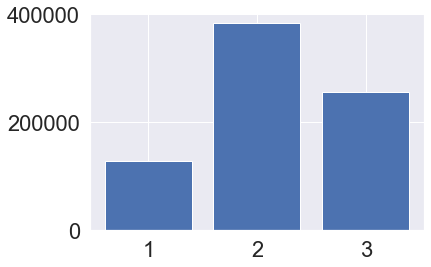

Class=3, n=383506 (33.333%)
Class=1, n=383506 (33.333%)
Class=2, n=383506 (33.333%)


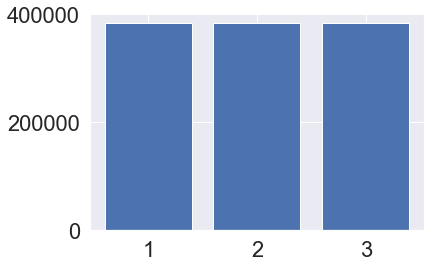

In [51]:
# Testing the Code

counter = Counter(yTrain11)

for k,v in counter.items():
    per = v / len(yTrain11) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

oversample=SMOTE()
XOverSample11, yOverSample11 = oversample.fit_resample(xTrain11, yTrain11)

counter2 = Counter(yOverSample11)
for k1,v1 in counter2.items():
    per1 = v1 / len(yOverSample11) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k1, v1, per1))
plt.bar(counter2.keys(), counter2.values())
plt.show()

In [52]:
labels=['B','D','F','N','Class']
XOverSample11=pd.DataFrame(XOverSample11,columns=labels)
yOverSample11=pd.DataFrame(yOverSample11,columns=['Class'])

In [53]:
# Building Logistic Regression With non-Corelated Features & Class Balancing 

to_drop = [ 'Class']
pipelineAlphaLrUnCorrSmote=Pipeline([
    ('mapper',DataFrameMapper([
    (XOverSample11.columns.drop(to_drop).values,
     [StandardScaler()]
    )
    ])),
    ('classifier',SGDClassifier(class_weight='balanced', alpha=alphaToUseLR, penalty='l2', loss='log', random_state=1))
])

pipelineAlphaLrUnCorrSmote.fit(XOverSample11,yOverSample11)
predictProbSigLrUnCorrSmote=pipelineAlphaLrUnCorrSmote.predict_proba(xCv11)
print("for alpha = {},Log Loss : {}".format(alphaToUseLR,log_loss(yCv11, predictProbSigLrUnCorrSmote)))

for alpha = 0.001,Log Loss : 1.1005984296396296


In [55]:
predict11Smote=pipelineAlphaLrUnCorrSmote.predict_proba(XOverSample11)
print("Log-Loss for Train data is {}".format(log_loss(yOverSample11,predict11Smote)))
predict11Smote=pipelineAlphaLrUnCorrSmote.predict_proba(xCv11)
allLogLossCv['LrUnCorrSmote']=log_loss(yCv11,predict11Smote)
print("Log-Loss for CV data is {}".format(log_loss(yCv11,predict11Smote)))
predict11Smote=pipelineAlphaLrUnCorrSmote.predict_proba(xTest11)
allLogLossTest['LrUnCorrSmote']=log_loss(yTest11,predict11Smote)
print("Log-Loss for Test data is {}".format(log_loss(yTest11,predict11Smote)))

Log-Loss for Train data is 1.098646044383367
Log-Loss for CV data is 1.1005984296396296
Log-Loss for Test data is 1.1005730305769812


Implementing the Logistic Regression on the features which has collinearity less than threshold and balanced using SMOTE.The Improvement on the log-loss is not significant

The lack in the significant improvement on the Model after applying all the above techniques prompted me to use SVM

# 2. Support Vector Machines

## 2.0. Support Vector Machines Hyper Paramenter Tuning to get best Alpha

In [57]:
alphaSVM = [10 ** x for x in range(-5, 3)]
to_drop = [ 'Class']
logLossArrayCvSvm = []
for i in alphaSVM:
    pipelineAlphaSvm=Pipeline([
        ('mapper',DataFrameMapper([
        (xTrain.columns.drop(to_drop).values,
         [StandardScaler()]
        )
        ])),
        ('classifier',CalibratedClassifierCV(SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=1), method="sigmoid"))
    ])
    
    pipelineAlphaSvm.fit(xTrain, yTrain)
    predictProbSigsvm=pipelineAlphaSvm.predict_proba(xCv.iloc[:,:-1])
    logLossArrayCvSvm.append(log_loss(yCv, predictProbSigsvm, eps=1e-15))
    print("for alpha = {},Log Loss : {}".format(i,log_loss(yCv, predictProbSigsvm)))

for alpha = 1e-05,Log Loss : 1.011660944863229
for alpha = 0.0001,Log Loss : 1.0116619280293253
for alpha = 0.001,Log Loss : 1.011663883254143
for alpha = 0.01,Log Loss : 1.0116618249511005
for alpha = 0.1,Log Loss : 1.0116610586112442
for alpha = 1,Log Loss : 1.0116643635315063
for alpha = 10,Log Loss : 1.0116616572319534
for alpha = 100,Log Loss : 1.0116598427955115


Tuning the data to get the best hyperparameter so as to fit the model with the best ALpha 

In [60]:
alphaToUseSvm=alphaLR[bestAlphaLr]
alphaToUseSvm

0.001

In [61]:
to_drop = [ 'Class']
pipelineAlphaSvm=Pipeline([
    ('mapper',DataFrameMapper([
    (xTrain.columns.drop(to_drop).values,
     [StandardScaler()]
    )
    ])),
    ('classifier',CalibratedClassifierCV(SGDClassifier( class_weight='balanced', alpha=alphaToUseSvm, penalty='l2', loss='hinge', random_state=1), method="sigmoid"))
])

pipelineAlphaSvm.fit(xTrain, yTrain)
predictProbSigsvm=pipelineAlphaSvm.predict_proba(xCv.iloc[:,:-1])
print("for alpha = {},Log Loss : {}".format(alphaToUseSvm,log_loss(yCv, predictProbSigsvm)))

for alpha = 100,Log Loss : 1.011663883254143


In [68]:
predictSvm=pipelineAlphaSvm.predict_proba(xTrain)
print("Log-Loss for Train data is {}".format(log_loss(yTrain,predictSvm)))
predictSvm=pipelineAlphaSvm.predict_proba(xCv)
allLogLossCv['SvmBal']=log_loss(yCv,predictSvm)
print("Log-Loss for CV data is {}".format(log_loss(yCv,predictSvm)))
predictSvm=pipelineAlphaSvm.predict_proba(xTest)
allLogLossTest['SvmBal']=log_loss(yTest11,predictSvm)
print("Log-Loss for Test data is {}".format(log_loss(yTest,predictSvm)))

Log-Loss for Train data is 1.0116585778877958
Log-Loss for CV data is 1.011663883254143
Log-Loss for Test data is 1.0116596782220348


In [66]:
to_drop = [ 'Class']
pipelineAlphaSvmSmote=Pipeline([
    ('mapper',DataFrameMapper([
    (XOverSample11.columns.drop(to_drop).values,
     [StandardScaler()]
    )
    ])),
    ('classifier',CalibratedClassifierCV(SGDClassifier( class_weight='balanced', alpha=alphaToUseSvm, penalty='l2', loss='hinge', random_state=1), method="sigmoid"))
])
pipelineAlphaSvmSmote.fit(XOverSample11,yOverSample11)
predictProbSigsvmSmote=pipelineAlphaSvmSmote.predict_proba(xCv.iloc[:,:-1])
print("for alpha = {},Log Loss : {}".format(alphaToUseSvm,log_loss(yCv, predictProbSigsvmSmote)))

for alpha = 0.001,Log Loss : 1.0986135356769147


In [70]:
# Predicting SVM With non-Corelated Features & Class Balancing SMote
predictNonCorSvm=pipelineAlphaSvmSmote.predict_proba(XOverSample11)
print("Log-Loss for Train data is {}".format(log_loss(yOverSample11,predictNonCorSvm)))
predictNonCorSvm=pipelineAlphaSvmSmote.predict_proba(xCv11)
allLogLossCv['SvmBalSmote']=log_loss(yCv11,predictNonCorSvm)
print("Log-Loss for CV data is {}".format(log_loss(yCv11,predictNonCorSvm)))
predictNonCorSvm=pipelineAlphaSvmSmote.predict_proba(xTest11)
allLogLossTest['SvmBalSmote']=log_loss(yTest11,predictNonCorSvm)
print("Log-Loss for Test data is {}".format(log_loss(yTest11,predictNonCorSvm)))

Log-Loss for Train data is 1.0986115832781822
Log-Loss for CV data is 1.0986135356769147
Log-Loss for Test data is 1.098612372015507


In [75]:
diffrenceLogLoss=dict()
for i in allLogLossTest.keys():
    diffrenceLogLoss[i]=abs(allLogLossTest[i]-allLogLossCv[i])
diffrenceLogLoss

{'randModel': 0.002568867817899889,
 'LrBal': 3.4084434195058577e-06,
 'LrNoBal': 3.4084434195058577e-06,
 'LrBalSmote': 1.2192936895472073e-05,
 'LrUnCorr': 1.739365250563729e-05,
 'LrUnCorrSmote': 2.539906264842351e-05,
 'SvmBal': 4.2050321080733255e-06,
 'SvmBalSmote': 1.1636614076770968e-06}

Checking the diffrence of the  log-loss dictionaries to get a sense whether any model is overFit or underfit.<br>
Based on the diffrence which is small for all the values there is no UNderfit and Overfit<br>

In [76]:
min(allLogLossTest, key=allLogLossTest.get)

'SvmBal'

Checking the least log-loss from the dictionary.Even thougth the values of log-loss are not that significantly diffrent.  Comparing the time complexity for entire processing including Model Building and time taken to process the data .Picking the SVM with Balancing as the Most optimal Model and buildign the final Model.

# Final Model

In [98]:
final_pipeline = Pipeline([
 ('scaler',StandardScaler()),
 ('classifier',
  CalibratedClassifierCV(SGDClassifier( class_weight='balanced', alpha=alphaToUseSvm, penalty='l2', loss='hinge', random_state=1), method="sigmoid")
 )
 ])

In [99]:
final_pipeline.fit(xTrain.iloc[:,:-1],yTrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001,
                                                                     class_weight='balanced',
                                                                     random_state=1)))])

In [100]:
prediction=final_pipeline.predict_proba(xTest.iloc[:,:-1])
print('Test set log-loss score for best params: %.3f ' % log_loss(yTest, prediction))

Test set log-loss score for best params: 1.012 


Log-Loss for the Final  Model is  1.012 

# Onyxx Creation

In [101]:
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import onnxruntime as rt

import onnxruntime as rt


input_types = dict([(x, FloatTensorType([None, 1])) for x in xTrain.iloc[:,:-1].columns.values])
print(input_types)
try:
    model_onnx = convert_sklearn(final_pipeline,
                                 'data_public_onnx',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("data_public.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

{'A': FloatTensorType(shape=[None, 1]), 'B': FloatTensorType(shape=[None, 1]), 'C': FloatTensorType(shape=[None, 1]), 'D': FloatTensorType(shape=[None, 1]), 'E': FloatTensorType(shape=[None, 1]), 'F': FloatTensorType(shape=[None, 1]), 'G': FloatTensorType(shape=[None, 1]), 'H': FloatTensorType(shape=[None, 1]), 'I': FloatTensorType(shape=[None, 1]), 'J': FloatTensorType(shape=[None, 1]), 'K': FloatTensorType(shape=[None, 1]), 'L': FloatTensorType(shape=[None, 1]), 'M': FloatTensorType(shape=[None, 1]), 'N': FloatTensorType(shape=[None, 1]), 'O': FloatTensorType(shape=[None, 1])}


In [102]:
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in xTest.iloc[:,:-1].to_dict(orient='list').items()}
inputs_onnx
session_onnx = rt.InferenceSession("data_public.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [2 2 2 ... 2 2 2]


# Graphical representation Using GraphViz

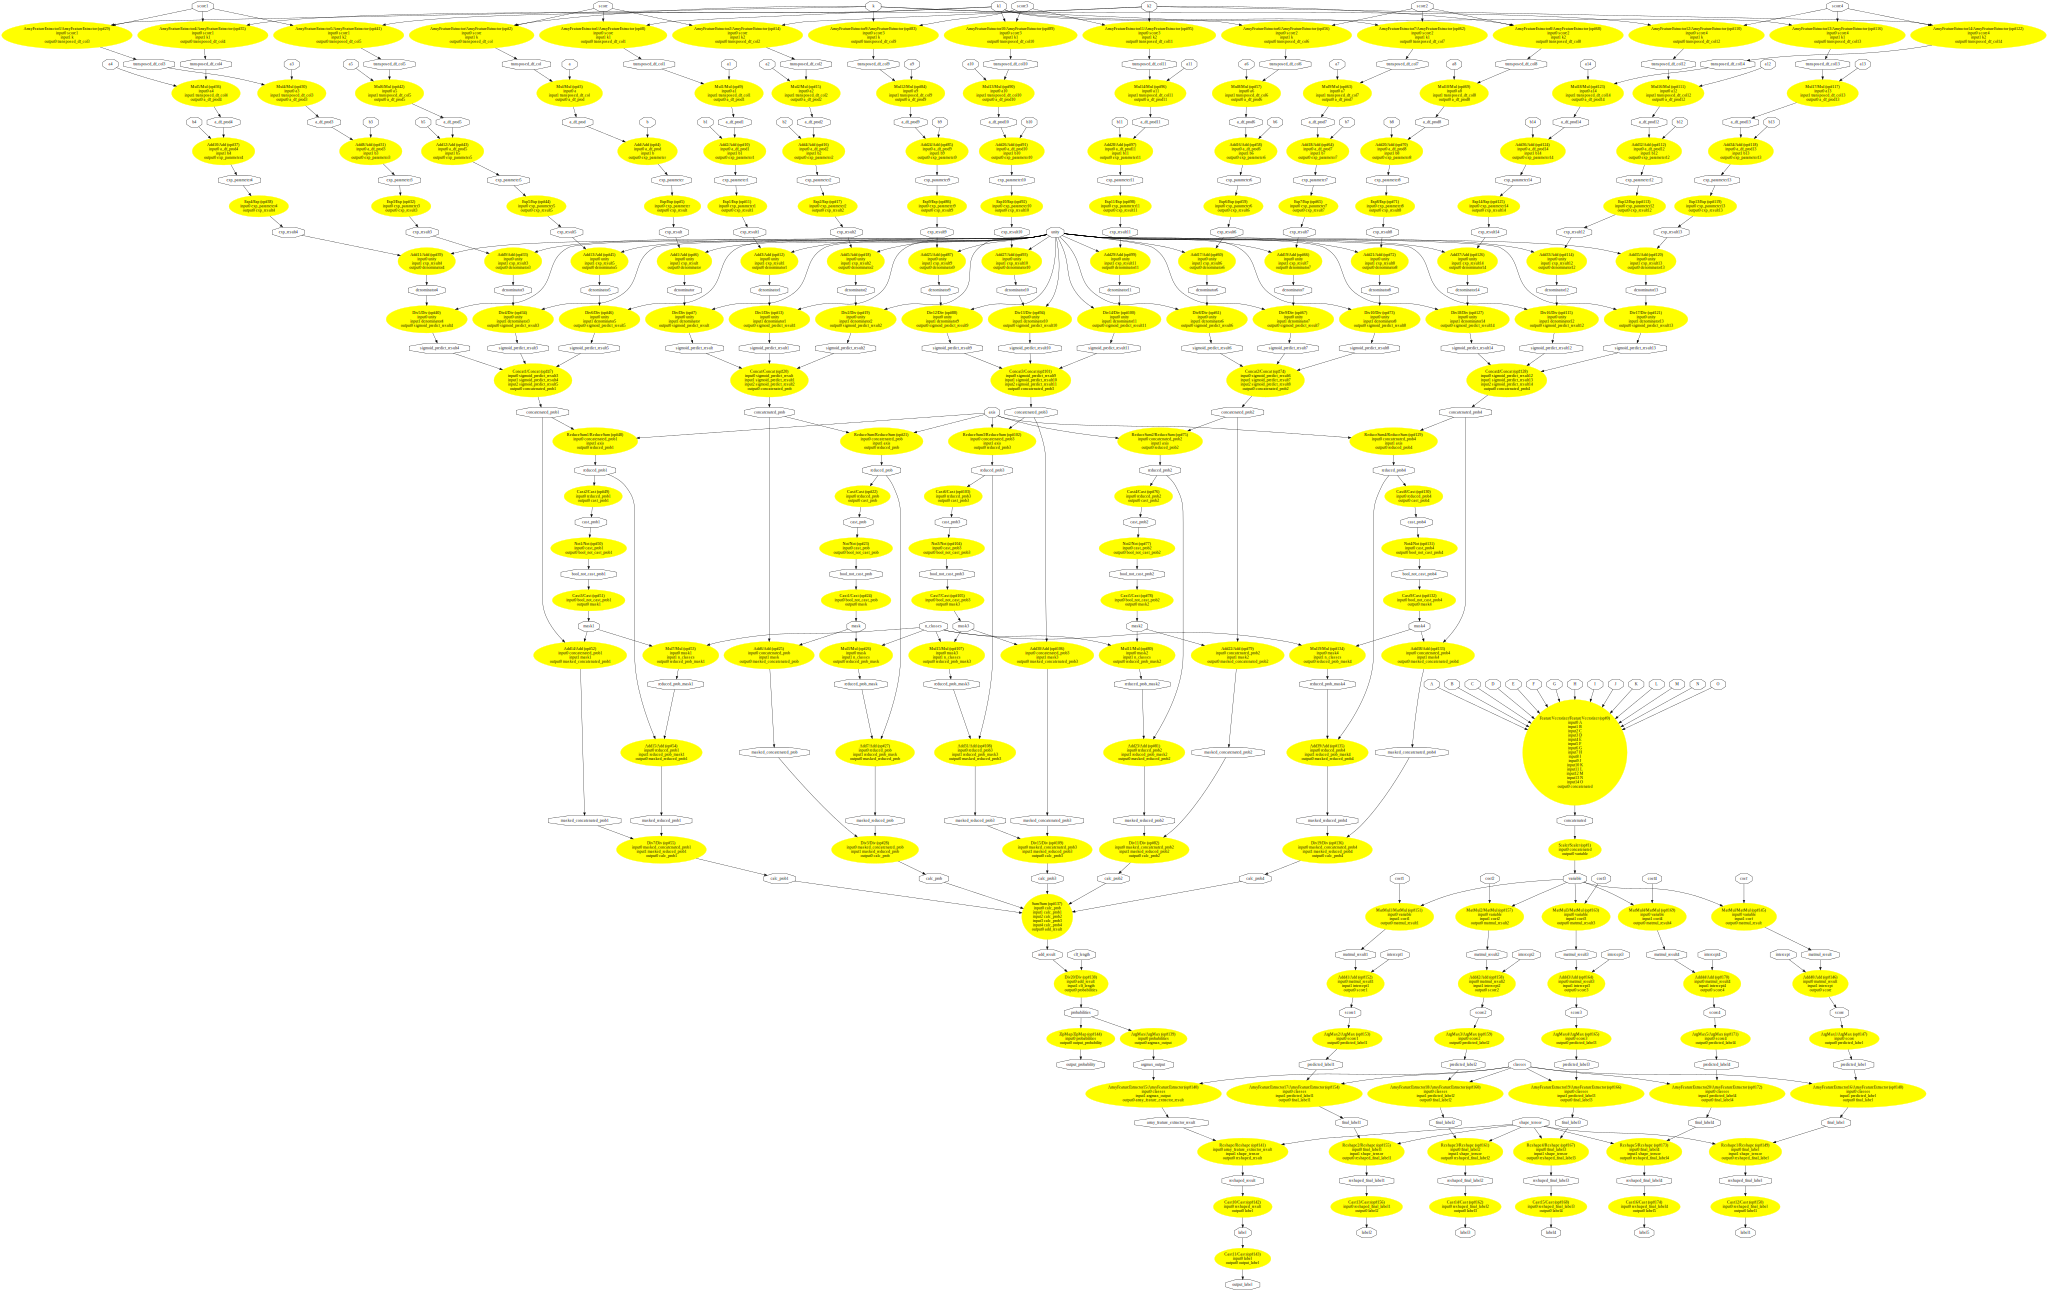

In [95]:
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import graphviz
pydot_graph = GetPydotGraph(model_onnx.graph,
                            name=model_onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="yellow",
                                                            fillcolor="yellow",
                                                            style="filled"))

graphviz.Source(pydot_graph)

# Conclusion 

By Calculating the Difference between the cross-validation and Test Log-Loss for each classifier we can say that model did not overfit or underfit. By checking the Correlation between the features we have reduced the number of features present in the dataset The final dataset has  “B”,”D”,”F”,”N” as the final features I think these can be further reduced but a detailed analysis of the data and its distribution has to be checked as for  all the features so as to keep optimal number of features keeping the loss of information to its lowest. As all the Model has almost similar Log-Loss it points me do further data preprocessing which might further decrease the Loss.

# Reference:<br>
The resources that I have used to complete the project are:<br><br>
https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976<br>
https://towardsdatascience.com/how-to-handle-smote-data-in-imbalanced-classification-problems-cf4b86e8c6a1<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html<br>
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter<br>
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html<br>
https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/<br>
